
linear MSE= 1979382.93
linear R2= 0.32343836560211636

Poly MSE= 1840616.8
poly R2= 0.33070363243505796

Linear coefficients= [15.63344207]
Linear intercept= -15.32294412934607

---, a*x + b*x^2
Poly coefficients= [ 0.00000000e+00  1.68744879e+01 -4.14378595e-03]
Poly intecept= -102.86214996039371


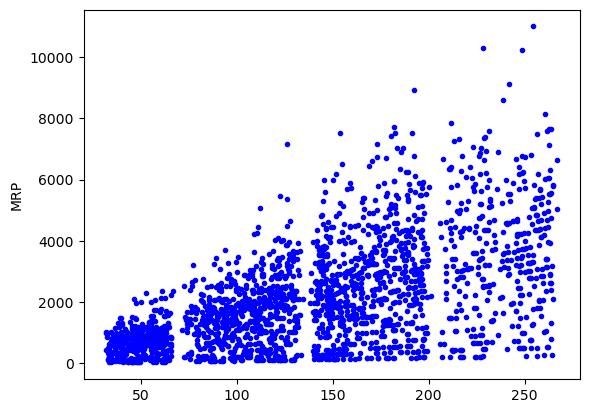

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#import test and train file

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression

# one model for linear regression, and another for polynomial
lreg = LinearRegression()
lregPoly = LinearRegression()


poly = PolynomialFeatures (degree=2)


# features for linear regression
X = train.loc[:,['Item_MRP']]

# features for poly regression
Xpoly=poly.fit_transform(X)



#splitting into training and cv for cross validation, for linear regression
x_train, x_cv, y_train, y_cv = train_test_split( X, train.Item_Outlet_Sales)

#splitting into training and cv for cross validation, for polynomial regression
x_trainP, x_cvP, y_trainP, y_cvP = train_test_split( Xpoly, train.Item_Outlet_Sales)


#training the linear model
lreg.fit (x_train, y_train)

#training the polynomial model
lregPoly.fit (x_trainP, y_trainP)

#predicting on cv:   polynomial
pred = lreg.predict (x_cv)

#predicting on cv:   linear
predP = lregPoly.predict (x_cvP)


#calculating mse
mse = np.mean((pred - y_cv)**2)
mseP = np.mean((predP - y_cvP)**2)

print ('\nlinear MSE=',round(mse,2))
print('linear R2=',r2_score (y_cv, pred))


print ('\nPoly MSE=',round(mseP,2))
print ('poly R2=',r2_score (y_cvP, predP))



# calculating coefficients
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)


plt.plot(x_cv, y_cv,'.',color='blue')
plt.ylabel('MRP')

print ('\nLinear coefficients=',lreg.coef_)
print ('Linear intercept=',lreg.intercept_)

print ('\n---, a*x + b*x^2')
print ('Poly coefficients=',lregPoly.coef_)
print ('Poly intecept=',lregPoly.intercept_)




In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

print('features=', train.columns)
print('\n')

lreg = LinearRegression()

train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

X = train.loc[:, ['Item_MRP']]

# Create a PolynomialFeatures object with a degree of 2
poly = PolynomialFeatures(degree=2)

# Fit and transform the X data
X_poly = poly.fit_transform(X)

# Splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X_poly, train.Item_Outlet_Sales, test_size=0.5)

# Training the model
lreg.fit(x_train, y_train)

# Predicting on cv
pred = lreg.predict(x_cv)

# Calculating mse
mse = np.mean((pred - y_cv) ** 2)

print('Polynomial Degree 2 MSE=', round(mse, 2))
print('R2=', round(r2_score(y_cv, pred), 2))

# Calculating coefficients
coeff = DataFrame(poly.get_feature_names_out(X.columns))
coeff['Coefficient Estimate'] = Series(lreg.coef_)

print(coeff)
print('Intercept=', round(lreg.intercept_, 2))


features= Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


Polynomial Degree 2 MSE= 1938209.75
R2= 0.33
            0  Coefficient Estimate
0           1              0.000000
1    Item_MRP             17.251183
2  Item_MRP^2             -0.005563
Intercept= -107.6


In [4]:

# importing basic libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#import test and train file
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## training the model




train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

# importing linear regressionfrom sklearn

lreg = LinearRegression()
lregPoly = LinearRegression()

poly = PolynomialFeatures(degree=2)


train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

#X = train.loc[:,['Item_MRP']]
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]


Xpoly=poly.fit_transform(X)






#splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales,test_size=0.5, random_state=42)

x_trainP, x_cvP, y_trainP, y_cvP = train_test_split(Xpoly,train.Item_Outlet_Sales,test_size=0.5, random_state=42)



#training the model
lreg.fit(x_train,y_train)

ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(x_train,y_train)

lassoReg = Lasso(alpha=0.1)
lassoReg.fit(x_train,y_train)


lregPoly.fit(x_trainP,y_trainP)


#predicting on cv
pred = lreg.predict(x_cv)
predRidge = ridgeReg.predict(x_cv)
predLasso = lassoReg.predict(x_cv)

predP = lregPoly.predict(x_cvP)


#calculating mse
mse = np.mean((pred - y_cv)**2)
mseP = np.mean((predP - y_cvP)**2)
mseRidge = np.mean((predRidge - y_cv)**2)
mseLasso = np.mean((predLasso - y_cv)**2)


print ('\nMSE=',mse)
print ('MSE Ridge=',mseRidge)
print ('MSE Lasso=',mseLasso)
print ('MSE Poly=',mseP)


print('\nlinear R2=',r2_score (y_cv, pred))
print ('ridge R2=',r2_score (y_cv, predRidge))
print ('lasso R2=',r2_score (y_cv, predLasso))
print ('poly R2=',r2_score (y_cvP, predP))


print('\nlinear coeff= ',lreg.coef_)
print('ridge coeff=',ridgeReg.coef_)
print('lasso coeff=',lassoReg.coef_)
print('Poly coeff= ' ,lregPoly.coef_)








MSE= 1911745.807524302
MSE Ridge= 1911745.8063104101
MSE Lasso= 1911744.9203345703
MSE Poly= 1888705.8369494916

linear R2= 0.3223382719562988
ridge R2= 0.3223382723865904
lasso R2= 0.32233858644085245
poly R2= 0.33050531289466567

linear coeff=  [11.15095978 15.73267091 -2.60134635]
ridge coeff= [11.15095602 15.7326708  -2.60134287]
lasso coeff= [11.14952317 15.73263037 -2.59571036]
Poly coeff=  [ 0.00000000e+00 -7.97393966e+01  1.59088372e+01  1.54988122e+01
  2.47226315e+00  5.79236810e-02 -6.38060624e-02 -5.09319854e-03
  3.94640080e-02 -8.79231864e-01]
